In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cmm = pd.read_csv("Data/CMM.csv")

In [3]:
cmm.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1.0,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,1.0,0.0,1.0
1,2,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
2,3,2.0,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,0.0,0.0,1.0
3,4,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
4,5,NaN,1,417740,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN


In [4]:
datalength = len(cmm)
datalength

1335576

In [5]:
print(len(cmm['dim_claim_id'].unique()))
print(len(cmm))

1335576
1335576


In [6]:
print(len(cmm['bin'].unique()))

4


In [7]:
print(len(cmm['drug'].unique()))

3


In [8]:
print(len(cmm[cmm['dim_pa_id'].notna()]))

555951


In [9]:
np.sum(cmm[cmm['dim_pa_id'].notna()]['reject_code'].notna())

555951

In [10]:
np.sum(cmm[cmm['dim_pa_id'].notna()]['pa_approved'].notna())

555951

In [11]:
np.sum(cmm[cmm['dim_pa_id'].notna()]['correct_diagnosis'].notna())

555951

In [12]:
np.sum(cmm[cmm['dim_pa_id'].notna()]['tried_and_failed'].notna())

555951

In [13]:
np.sum(cmm[cmm['dim_pa_id'].notna()]['contraindication'].notna())

555951

In [14]:
cmm_pa = cmm[cmm['dim_pa_id'].notna()]
cmm_pa_train, cmm_pa_test = train_test_split(cmm_pa, test_size = 0.2, 
                                             random_state = 10475, shuffle = True,
                                            stratify = cmm_pa.pa_approved)

We should only look at cmm_pa_train from this point.

We also compute how is_approved correlates with some other discrete variables. 

## pa_approved vs correct_diagnosis
Let's compute the correlation of pa_approved with correct diagnosis. 

In [15]:
#An auxilliary function to find the percentage of df[column1 == val1] given that df[column2 == val2 ]. 
def percentage_given(df, column1, val1, column2, val2):
    intersection = np.sum(np.logical_and(df[column1] == val1,df[column2] == val2));
    total = np.sum(df[column2] == val2);
    return np.round(100*intersection/total,3);

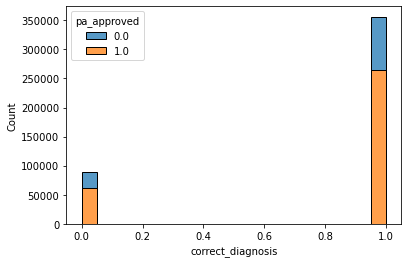

In [16]:
plt.figure()
sns.histplot(cmm_pa_train, x='correct_diagnosis', hue = 'pa_approved',multiple = 'stack')
plt.show()

In [17]:
print("The percentage of people whose PA is approved given that their diagnosis is correct is: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'correct_diagnosis',1))

print("The percentage of people whose PA is approved given that their diagnosis is incorrect is: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'correct_diagnosis',0))

The percentage of people whose PA is approved given that their diagnosis is correct is:  74.211
The percentage of people whose PA is approved given that their diagnosis is incorrect is:  70.379


## pa_approved vs contraindication
Now we compute the correlation between pa_approved and contraindication

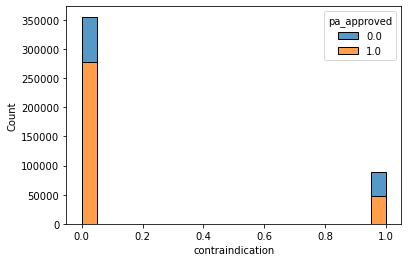

In [18]:
plt.figure()
sns.histplot(cmm_pa_train, x='contraindication', hue = 'pa_approved',multiple = 'stack')
plt.show()

In [19]:
print("The percentage of people whose PA is approved given contraindicatoin: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'contraindication',1))

print("The percentage of people whose PA is approved given no contraindication: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'contraindication',0))

The percentage of people whose PA is approved given contraindicatoin:  53.851
The percentage of people whose PA is approved given no contraindication:  78.355


## pa_approved vs tried_and_failed


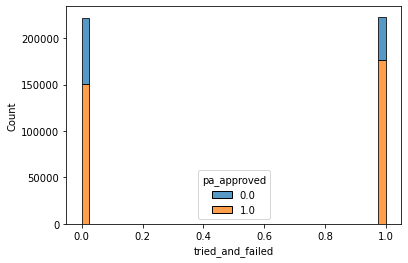

In [20]:
plt.figure()
sns.histplot(cmm_pa_train, x='tried_and_failed', hue = 'pa_approved',multiple = 'stack')
plt.show()

In [21]:
print("The percentage of people whose PA is approved given that the patient has tried and failed generic alternatives: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'tried_and_failed',1))

print("The percentage of people whose PA is approved given that the patiend has not triend and failed the generic alternative: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'tried_and_failed',0))

The percentage of people whose PA is approved given that the patient has tried and failed generic alternatives:  79.0
The percentage of people whose PA is approved given that the patiend has not triend and failed the generic alternative:  67.867


## pa_approved vs drug 

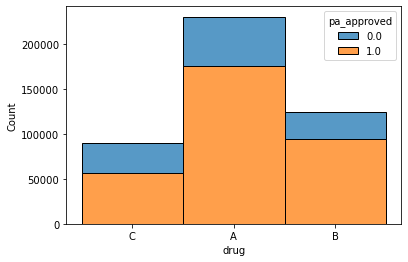

In [22]:
plt.figure()
sns.histplot(cmm_pa_train, x='drug', hue = 'pa_approved',multiple = 'stack')
plt.show()

In [23]:
drugs = ['A', 'B' , 'C']
for drug in drugs:
    print("The percentage of people whose PA is approved given that they use drug ", drug, "is : "
      , percentage_given(cmm_pa_train,'pa_approved',1,'drug',drug))

The percentage of people whose PA is approved given that they use drug  A is :  76.219
The percentage of people whose PA is approved given that they use drug  B is :  75.88
The percentage of people whose PA is approved given that they use drug  C is :  63.044


## pa_approved vs bin

In [24]:
#Commented because it takes very long to run
#plt.figure()
#sns.histplot(cmm_pa_train, x='bin', hue = 'pa_approved',multiple = 'stack')
#plt.show()

In [25]:
bins = cmm_pa_train.bin.unique()
for bin in bins:
    print("The percentage of people whose PA is approved given that they use the payer with BIN ", bin, "is : "
      , percentage_given(cmm_pa_train,'pa_approved',1,'bin',bin))

The percentage of people whose PA is approved given that they use the payer with BIN  417740 is :  62.908
The percentage of people whose PA is approved given that they use the payer with BIN  417614 is :  71.13
The percentage of people whose PA is approved given that they use the payer with BIN  417380 is :  78.606
The percentage of people whose PA is approved given that they use the payer with BIN  999001 is :  90.581
